# Tests coverage for genetic algorithm for the Courier Problem 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [36]:
import glob
import json

test_dir = "data/"
results_dir = "results/"

test_files = glob.glob(f"{test_dir}/*.json")


def get_json_key_lengths(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return {key: len(value) for key, value in data.items()}


tests_summary = []
for f in test_files:
    row = {"filename": f.replace("data/", "").replace(".json", "")}
    row.update(get_json_key_lengths(f))
    tests_summary.append(row)

tests_df = pd.DataFrame(tests_summary)

if "graph" in tests_df.columns:
    tests_df.drop(columns=["graph"], inplace=True)
if "permissions" in tests_df.columns:
    tests_df.drop(columns=["permissions"], inplace=True)

tests_df.sort_values(by="filename", inplace=True)


In [37]:
results_files = glob.glob(f"{results_dir}/*.csv")
results_df = pd.concat([pd.read_csv(f) for f in results_files], ignore_index=True)
results_df.sort_values(by="testcase")

,testcase,mutation_suite,cost_mean,cost_std,cost_max,cost_min,cost_median,iterations_mean,iterations_std,iterations_min,...,time_mean,time_std,time_min,time_max,time_median,cost_func_evals_min,cost_func_evals_max,cost_func_evals_mean,cost_func_evals_std,cost_func_evals_median
47,big,"['PackagesMutation', 'RouteMutation']",2793.43,792.42,3983.89,1541.99,2685.96,301.0,0.00,301,...,60.73,2.47,55.89,65.59,60.82,10912,13326,11806.2,680.62,11554.0
34,big,['UnusedVehiclesMutation'],11790.70,342.22,12387.08,11012.34,11802.57,101.6,29.97,66,...,20.71,6.37,13.15,32.79,19.15,2197,5050,3374.1,977.76,3114.0
35,big,['CouriersMutation'],14888.11,21.23,14909.97,14846.28,14895.31,43.7,12.40,31,...,8.61,2.83,6.41,16.45,7.56,1053,2521,1467.1,411.26,1288.0
36,big,['PackagesMutation'],1752.34,342.18,2602.21,1277.61,1752.28,279.6,25.89,230,...,46.82,5.60,37.70,58.19,46.28,9544,11592,10593.3,629.16,10528.0
37,big,['RouteMutation'],14842.82,17.67,14872.57,14815.77,14843.17,65.1,17.40,44,...,14.80,3.69,9.36,20.45,15.50,1568,3437,2331.3,624.65,2263.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,medium,['UnusedVehiclesMutation'],4524.64,317.28,5060.46,3888.79,4514.37,65.6,22.97,42,...,3.64,1.36,2.09,6.05,3.44,1628,4646,2722.6,1016.21,2398.5
65,medium,['UsedVehiclesMutation'],4397.19,1.62,4401.77,4396.23,4396.57,66.8,15.35,47,...,3.54,0.89,2.31,5.33,3.34,1832,3705,2551.4,539.99,2467.0
94,medium,"['UnusedVehiclesMutation', 'CouriersMutation',...",1508.09,190.35,1954.28,1236.02,1462.92,126.8,16.86,92,...,7.19,1.04,5.16,8.77,7.20,3381,5045,4255.8,502.73,4367.0
78,medium,"['CouriersMutation', 'RouteMutation']",5352.89,4.67,5364.19,5349.60,5350.33,57.2,15.28,38,...,3.32,0.83,2.33,5.13,3.01,1476,3547,2224.1,572.38,2075.0


In [38]:
tests_df.head()

,filename,couriers,vehicles,packages
0,big,20,30,40
2,correctness,20,5,5
1,medium,7,10,15


In [39]:
results_df.head()

,testcase,mutation_suite,cost_mean,cost_std,cost_max,cost_min,cost_median,iterations_mean,iterations_std,iterations_min,...,time_mean,time_std,time_min,time_max,time_median,cost_func_evals_min,cost_func_evals_max,cost_func_evals_mean,cost_func_evals_std,cost_func_evals_median
0,correctness,[],1579.14,7.39,1589.21,1563.50,1580.68,30.4,1.36,27,...,0.78,0.16,0.64,1.16,0.73,168,241,203.9,22.13,202.5
1,correctness,['UsedVehiclesMutation'],1540.11,12.28,1564.33,1522.12,1539.59,30.4,0.66,29,...,0.90,0.05,0.80,0.96,0.92,204,299,238.4,29.72,226.0
2,correctness,['UnusedVehiclesMutation'],1574.48,14.63,1600.28,1555.25,1577.04,30.4,2.01,27,...,0.96,0.15,0.80,1.36,0.91,264,345,304.9,27.19,314.0
3,correctness,['CouriersMutation'],1555.25,0.00,1555.25,1555.25,1555.25,33.1,3.45,29,...,1.06,0.25,0.82,1.74,0.97,302,411,339.6,38.79,317.5
4,correctness,['PackagesMutation'],584.17,126.87,964.02,538.04,538.04,32.8,2.09,29,...,0.80,0.14,0.62,1.14,0.80,236,358,288.9,40.17,303.5


In [60]:
mutation_aliases = {
    "CouriersMutation": "CM",
    "UsedVehiclesMutation": "UsedVM",
    "UnusedVehiclesMutation": "UnusedVM",
    "PackagesMutation": "PM",
    "RouteMutation": "RM",
}

In [79]:
import ast


def plot_statistics(df, stat_cols):
    max_mutations = 6
    nrows, ncols = 2, 3

    # Convert mutation_suite from string to list if necessary
    if isinstance(df["mutation_suite"].iloc[0], str):
        df = df.copy()
        df["mutation_suite"] = df["mutation_suite"].apply(ast.literal_eval)

    for testcase in df["testcase"].unique():
        df_test = df[df["testcase"] == testcase].copy()
        df_test["mutation_count"] = df_test["mutation_suite"].apply(len)
        df_test["mutation_label"] = df_test["mutation_suite"].apply(
            lambda x: ", ".join([mutation_aliases.get(m, m) for m in x])
        )

        fig, axes = plt.subplots(nrows, ncols, figsize=(24, 10), sharex=True)
        fig.suptitle(f"Results - {testcase}", fontsize=20)
        axes = axes.flatten()

        for i in range(max_mutations):
            ax = axes[i]
            subset = df_test[df_test["mutation_count"] == i]

            if subset.empty:
                ax.set_title(f"{i} mutations")
                ax.set_yticks([])
                continue

            labels = subset["mutation_label"].tolist()
            y = np.arange(len(labels))
            height = 0.15

            for j, stat in enumerate(stat_cols):
                ax.barh(y + j * height, subset[stat], height=height, label=stat)

            if i == 0:
                title = "No mutations"
            elif i == max_mutations - 1:
                title = f"All mutations ({i})"
            else:
                title = f"Mutation count = {i}"

            ax.set_title(title)
            if i == 5:
                ax.set_yticks([])
            else:
                ax.set_yticks(y + height * (len(stat_cols) - 1) / 2)
                ax.set_yticklabels(labels, rotation=0, va="center")
            ax.set_xlabel("Cost/Cost function evaluations")
            ax.legend(fontsize=8)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


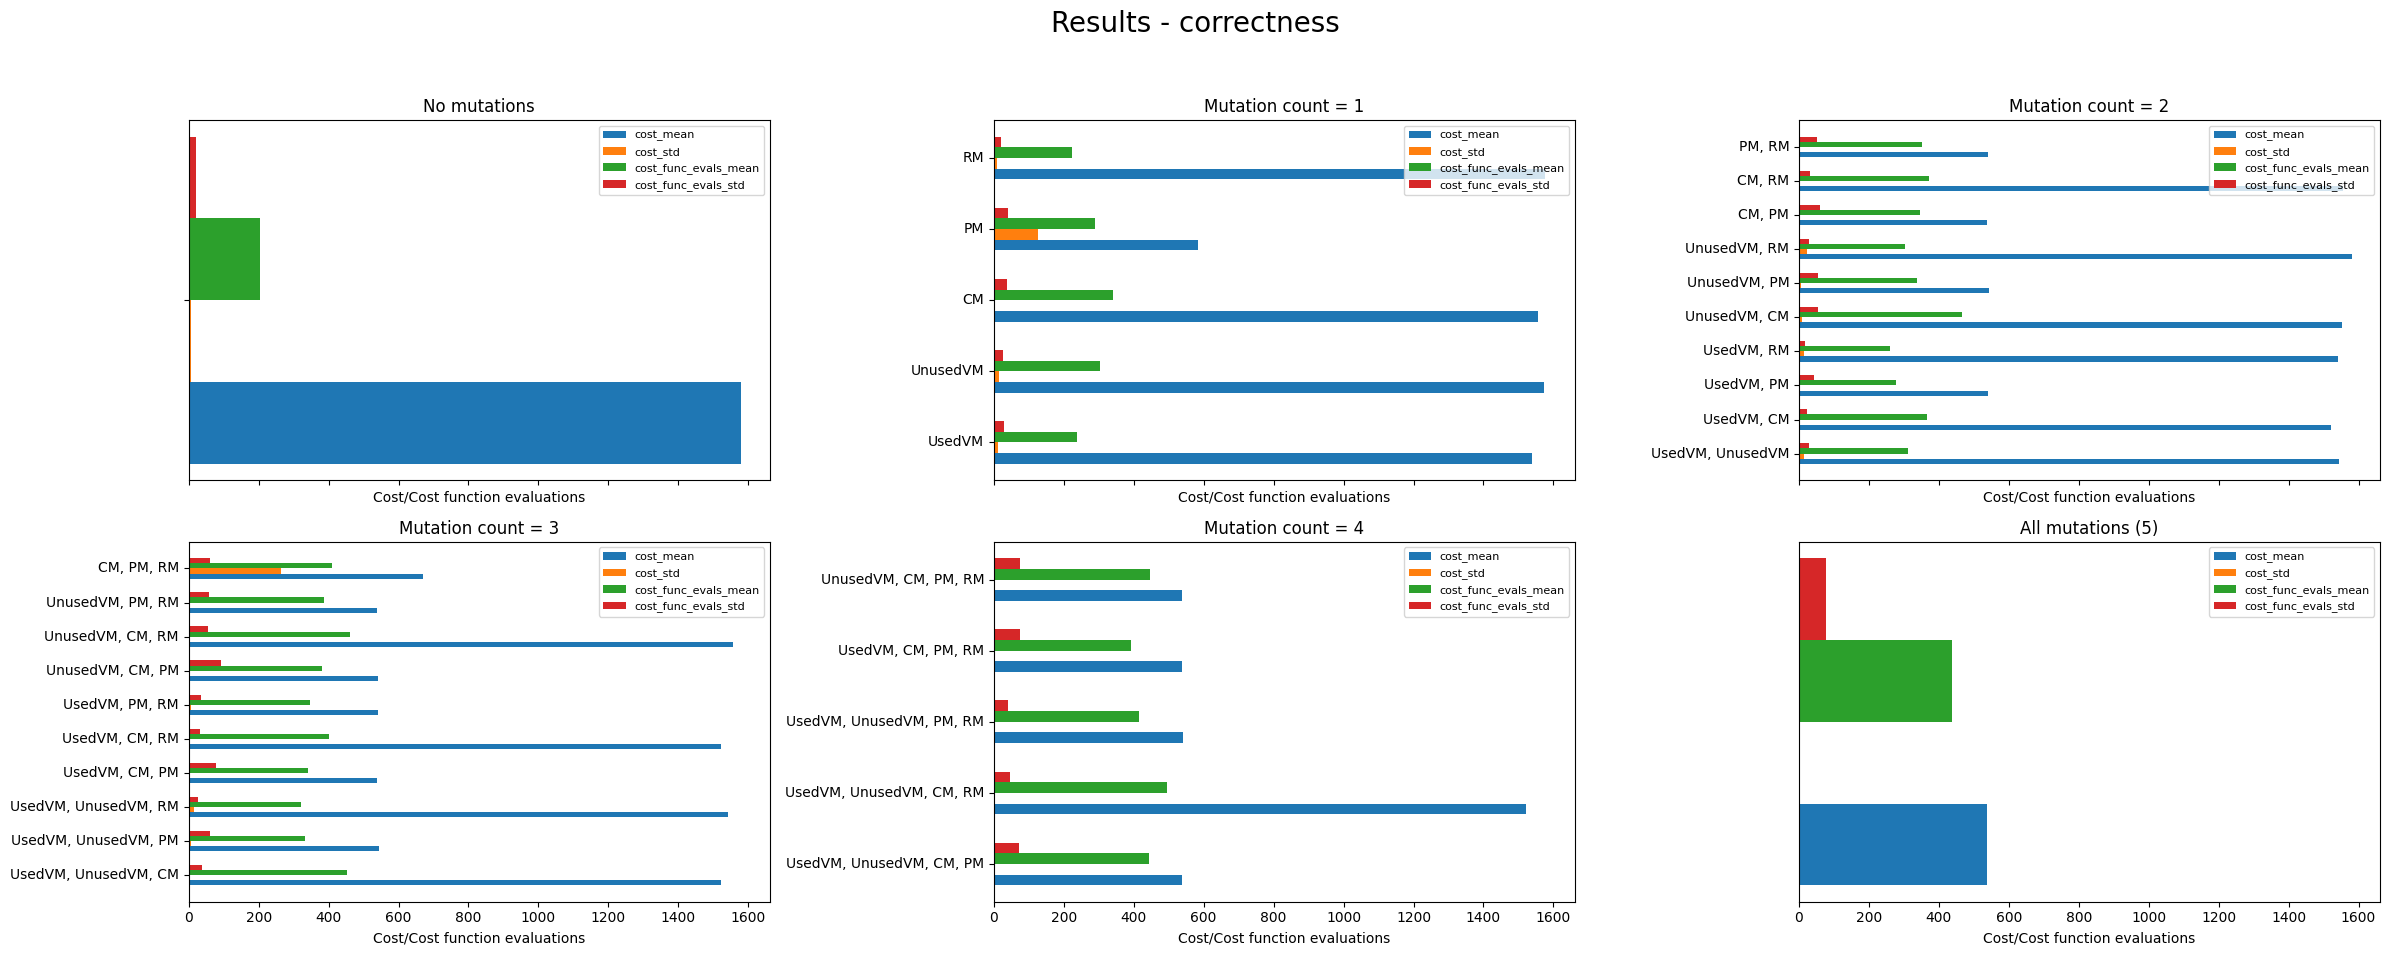

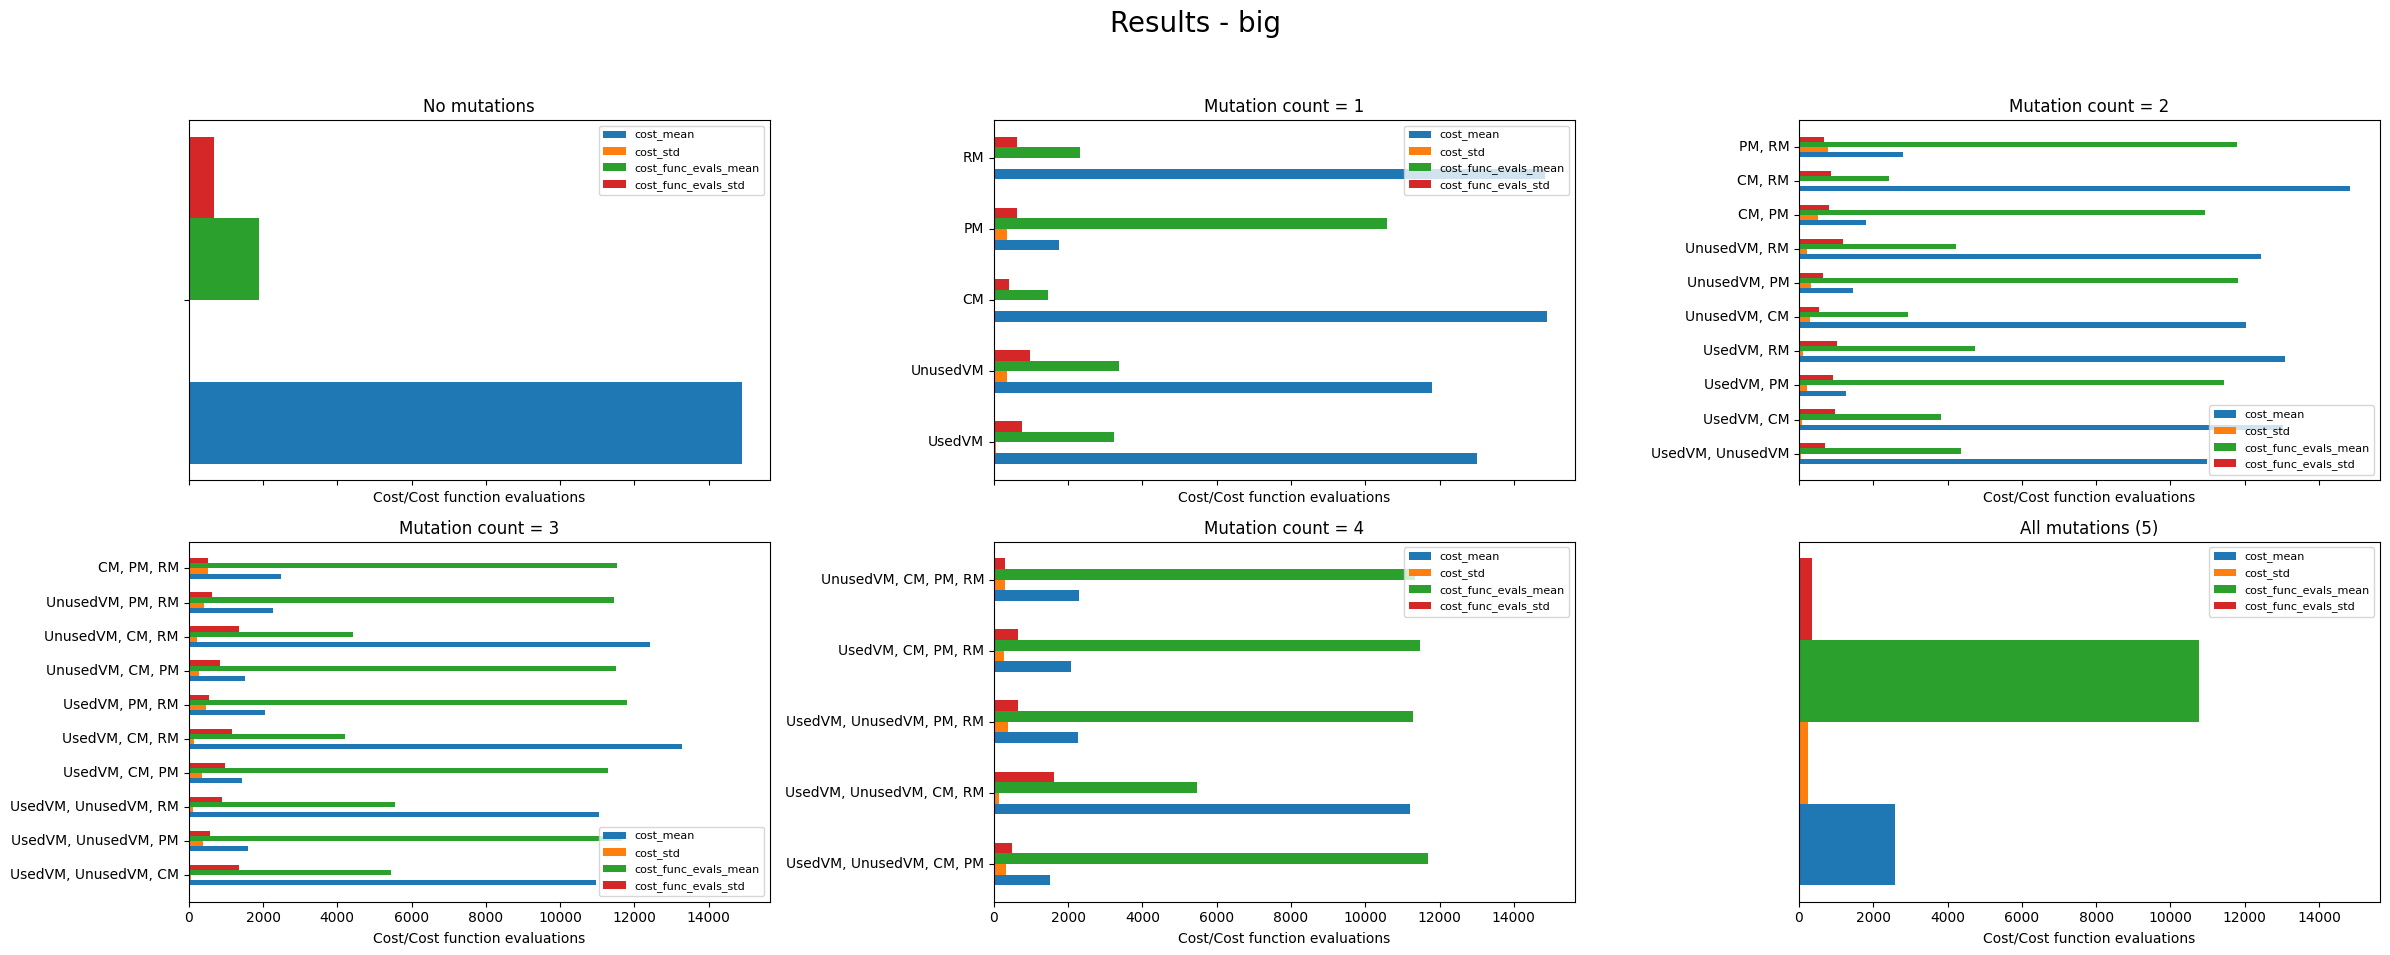

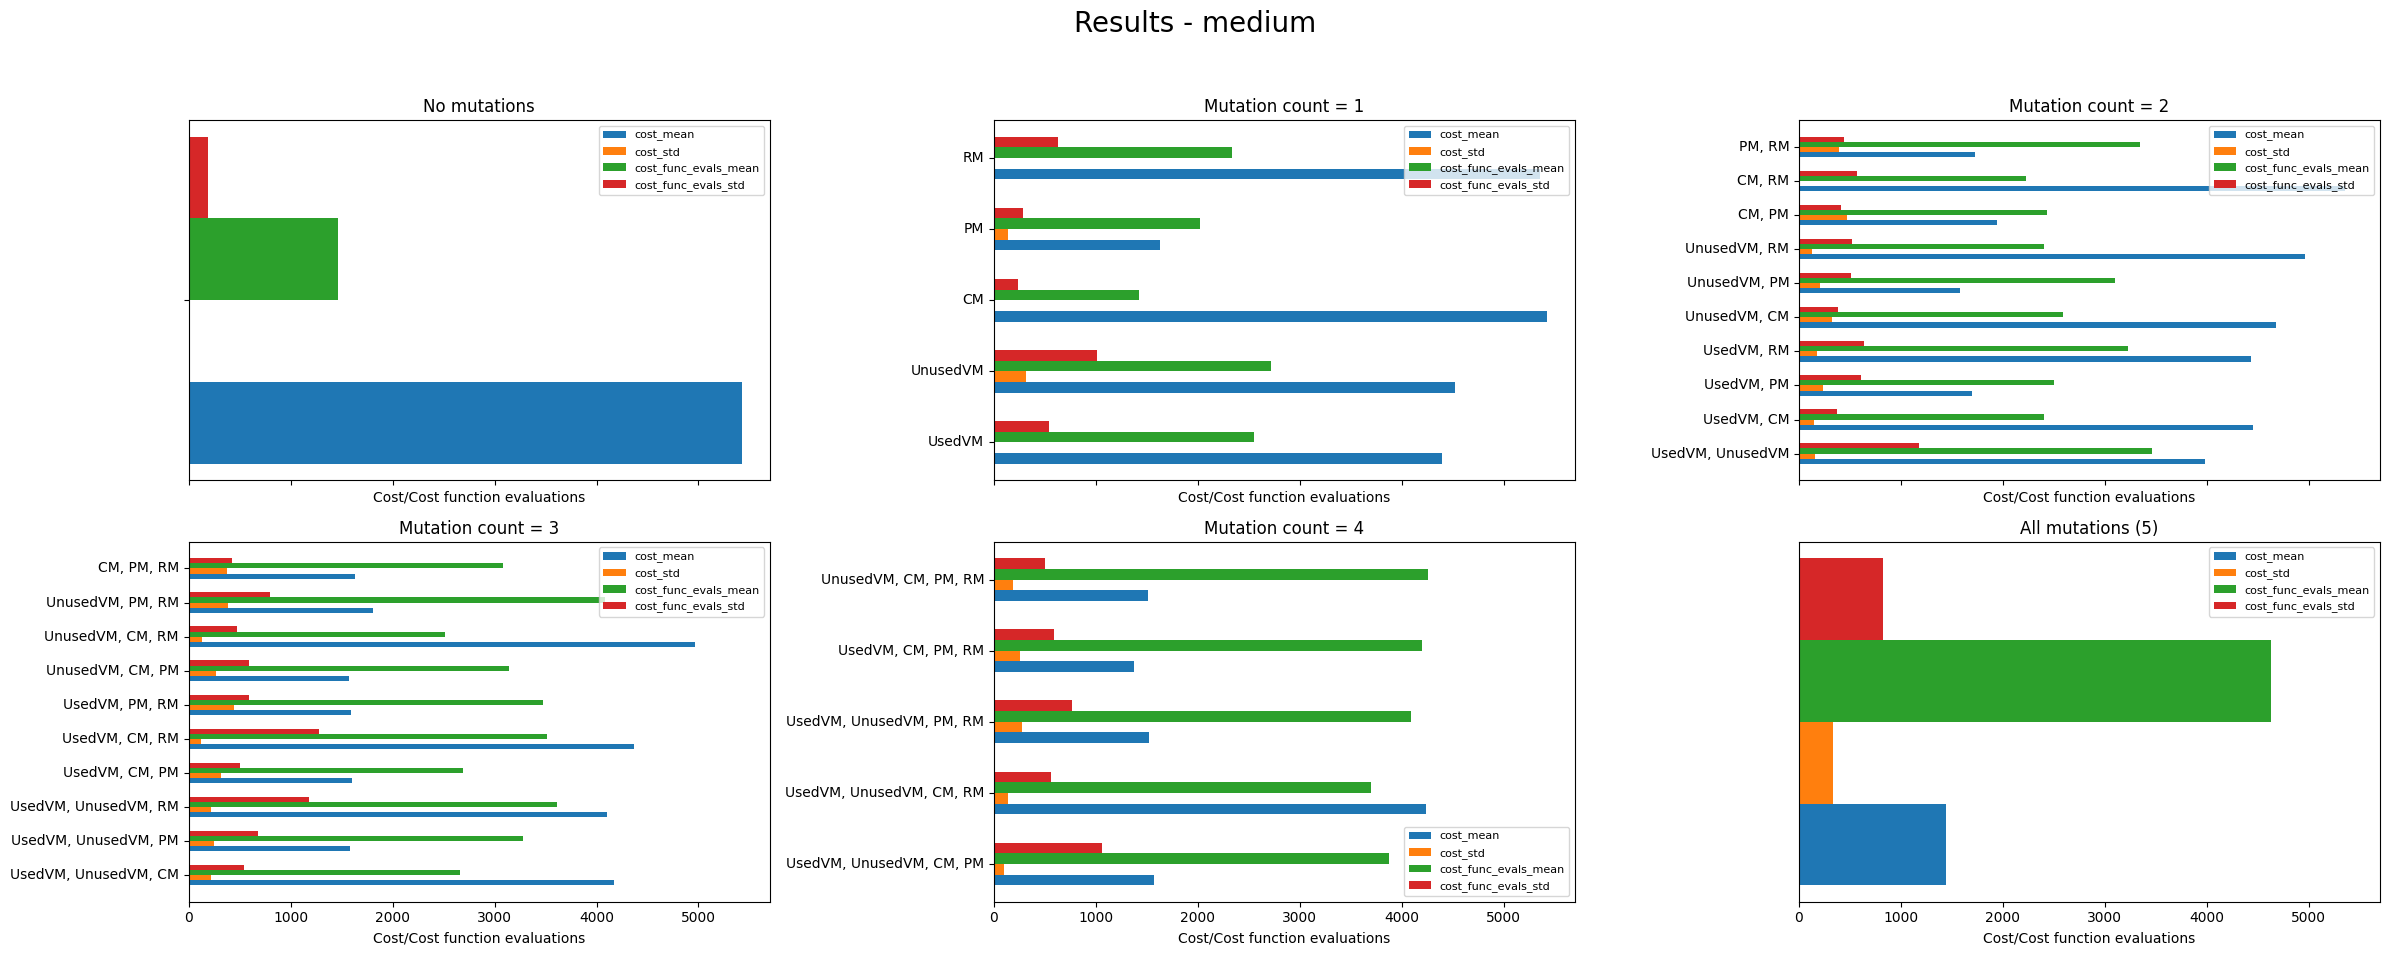

In [80]:
plot_statistics(
    results_df,
    stat_cols=["cost_mean", "cost_std", "cost_func_evals_mean", "cost_func_evals_std"],
)